http://www.practicepython.org/blog/2016/12/20/instagram-filters-python.html

Instagran filters in 15 lines of python code

In [1]:
import matplotlib.pyplot as plt
import skimage
from skimage import io
from skimage import filters
import numpy as np

In [2]:
import matplotlib
matplotlib.rcParams['xtick.major.size'] = 0
matplotlib.rcParams['ytick.major.size'] = 0
matplotlib.rcParams['xtick.labelsize'] = 0
matplotlib.rcParams['ytick.labelsize'] = 0

In [3]:
original_image = skimage.img_as_float(io.imread("pnoMhXQr9fc.jpg"))

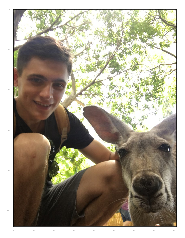

In [4]:
plt.imshow(original_image)
plt.show()

In [5]:
def sharpen(image, a, b, sigma=10):
    blurred = filters.gaussian(image, sigma=sigma, multichannel=True)
    sharper = np.clip(image * a - blurred * b, 0, 1.0)
    return sharper

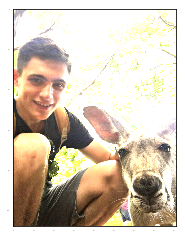

In [20]:
sharper = sharpen(original_image, 2.3, 0.3)
plt.imshow(sharper)
plt.show()

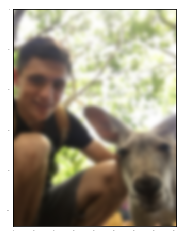

In [8]:
blurred = sharpen(original_image, 0, -1.0)
plt.imshow(blurred)
plt.show()

In [21]:
def channel_adjust(channel, values):
    # flatten
    orig_size = channel.shape
    flat_channel = channel.flatten()
    adjusted = np.interp(
        flat_channel,
        np.linspace(0, 1, len(values)),
        values)

    # put back into image form
    return adjusted.reshape(orig_size)

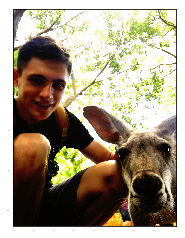

In [22]:
chan = channel_adjust(original_image, [0, 0.05, 0.5, 0.95, 1.0])
plt.imshow(chan)
plt.show()

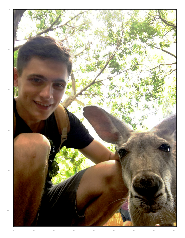

In [32]:
chan2 = channel_adjust(original_image, [0, 0, 0.25, 0.375, 0.5, 0.625, 0.865, 0.875, 1])
plt.imshow(chan2)
plt.show()

In [33]:
def split_image_into_channels(image):
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    return red_channel, green_channel, blue_channel

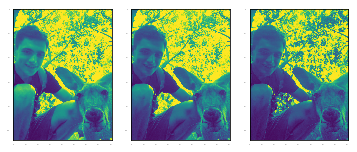

In [81]:
channels = split_image_into_channels(original_image)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
ax1.imshow(channels[0])
ax2.imshow(channels[1])
ax3.imshow(channels[2])

f.subplots_adjust(hspace=0.2)

plt.show()

In [82]:
def merge_channels(red_channel, green_channel, blue_channel):
    return np.stack([red_channel, green_channel, blue_channel], axis=2)

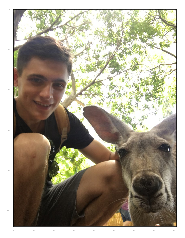

In [84]:
merge = merge_channels(channels[0], channels[1], channels[2])
plt.imshow(merge)
plt.show()

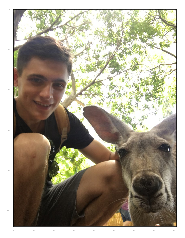

In [85]:
r, g, b = split_image_into_channels(original_image)
im = merge_channels(r, g, b)
plt.imshow(im)
plt.show()

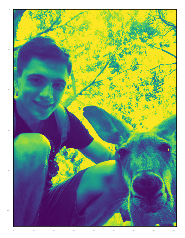

In [86]:
#The Gotham filter

#step 1
r, g, b = split_image_into_channels(original_image)

r_boost_lower = channel_adjust(r, [
    0, 0.05, 0.1, 0.2, 0.3,
    0.5, 0.7, 0.8, 0.9,
    0.95, 1.0])

plt.imshow(r_boost_lower)
plt.show()

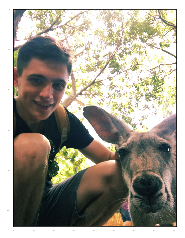

In [87]:
#step 2
bluer_blacks = merge_channels(r_boost_lower, g, np.clip(b + 0.03, 0, 1.0))

plt.imshow(bluer_blacks)
plt.show()

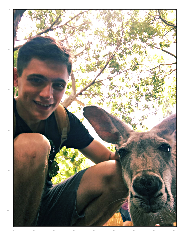

In [88]:
#step 3
sharper = sharpen(bluer_blacks, 1.3, 0.3, sigma=10)

plt.imshow(sharper)
plt.show()

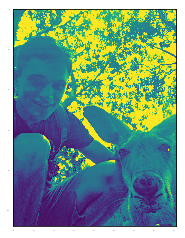

In [89]:
#step 4 and 5
r, g, b = split_image_into_channels(sharper)
b_adjusted = channel_adjust(b, [
    0, 0.047, 0.118, 0.251, 0.318,
    0.392, 0.42, 0.439, 0.475,
    0.561, 0.58, 0.627, 0.671,
    0.733, 0.847, 0.925, 1])

plt.imshow(b_adjusted)
plt.show()

In [96]:
#all together
def filter_gotham(user_img):
    def channel_adjust(channel, values):
        orig_size = channel.shape
        flat_channel = channel.flatten()
        adjusted = np.interp(flat_channel, np.linspace(0, 1, len(values)), values)
        return adjusted.reshape(orig_size)
    original_image = skimage.img_as_float(io.imread(user_img))
    r = original_image[:, :, 0]
    b = original_image[:, :, 2]
    r_boost_lower = channel_adjust(r, [
        0, 0.05, 0.1, 0.2, 0.3,
        0.5, 0.7, 0.8, 0.9,
        0.95, 1.0])
    b_more = np.clip(b + 0.03, 0, 1.0)
    merged = np.stack([r_boost_lower, original_image[:, :, 1], b_more], axis=2)
    blurred = filters.gaussian(merged, sigma=10, multichannel=True)
    final = np.clip(merged * 1.3 - blurred * 0.3, 0, 1.0)
    b = final[:, :, 2]
    b_adjusted = channel_adjust(b, [
        0, 0.047, 0.118, 0.251, 0.318,
        0.392, 0.42, 0.439, 0.475,
        0.561, 0.58, 0.627, 0.671,
        0.733, 0.847, 0.925, 1])
    final[:, :, 2] = b_adjusted
    
    return final


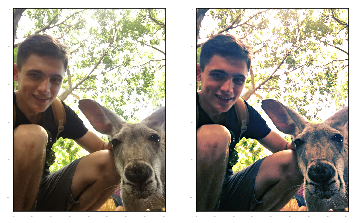

In [102]:
im_with_filter = filter_gotham("pnoMhXQr9fc.jpg")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.imshow(original_image)
ax2.imshow(im_with_filter)

plt.show()

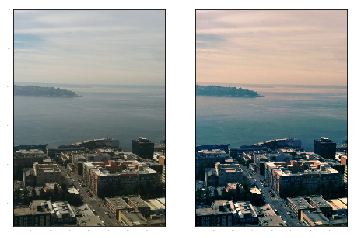

In [106]:
im_with_filter = filter_gotham("skyline.jpg")
original_image = skimage.img_as_float(io.imread("skyline.jpg"))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(original_image)
ax2.imshow(im_with_filter)

plt.show()

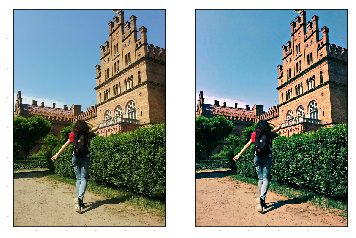

In [105]:
im_with_filter = filter_gotham("cher.jpg")
original_image = skimage.img_as_float(io.imread("cher.jpg"))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(original_image)
ax2.imshow(im_with_filter)

plt.show()